# Walmart Project

# Submission Guidelines:

For the following problem statements, follow the guidelines mentioned below:

1. Create a project report in a pdf format that will consist of the following:
    a. Problem Statement
    b. Project Objective
    c. Data Description
    d. Data Pre-processing Steps and Inspiration
    e. Choosing the Algorithm for the Project
    f. Motivation and Reasons For Choosing the Algorithm
    g. Assumptions
    h. Model Evaluation and Techniques
    i. Inferences from the Same
    j. Future Possibilities of the Project

2. Save your model for  project1 and provide a copy of the same during submission.

Problem Statement 1:
    
    A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import  accuracy_score

In [112]:
# Import dataset
data = pd.read_csv("Walmart.csv")

In [113]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [114]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [115]:
data.duplicated().sum()

0

In [116]:
data.shape

(6435, 8)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [118]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [120]:
data["Date"]=pd.to_datetime(data["Date"])

In [122]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [124]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [27]:
# 4. Exploratory Data Analysis (EDA)

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller




In [125]:
data.columns


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [127]:
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day
data['MonthYear_value']=data['Date'].dt.to_period('M')

In [128]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2010-05


In [130]:
data.shape

(6435, 12)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Holiday_Flag'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>],
       [<AxesSubplot:title={'center':'Unemployment'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

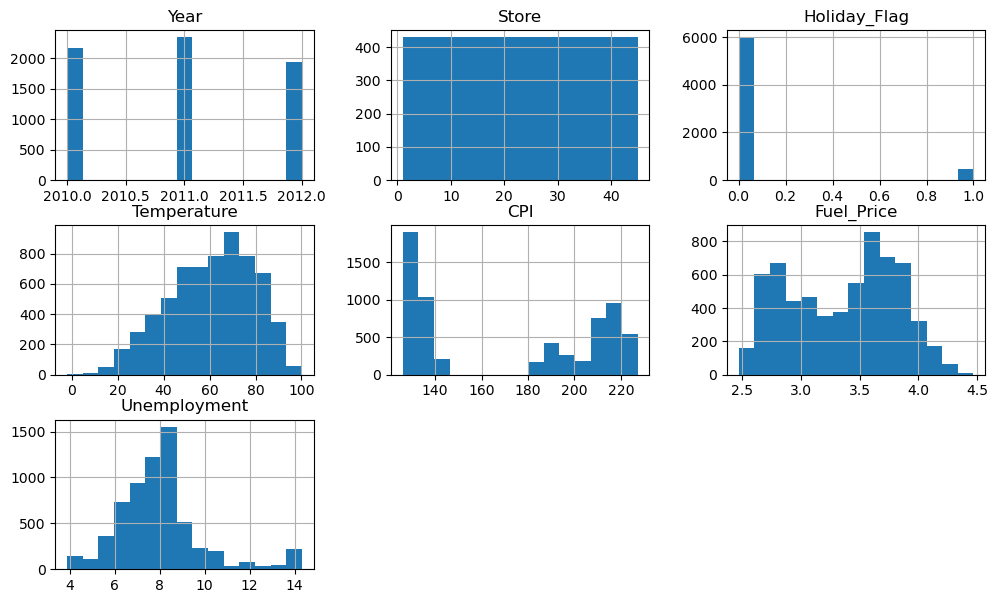

In [134]:
data[['Year', 'Store', 'Holiday_Flag','Temperature','CPI','Fuel_Price', 'Unemployment']].hist(
 bins=15, figsize=(12, 7))

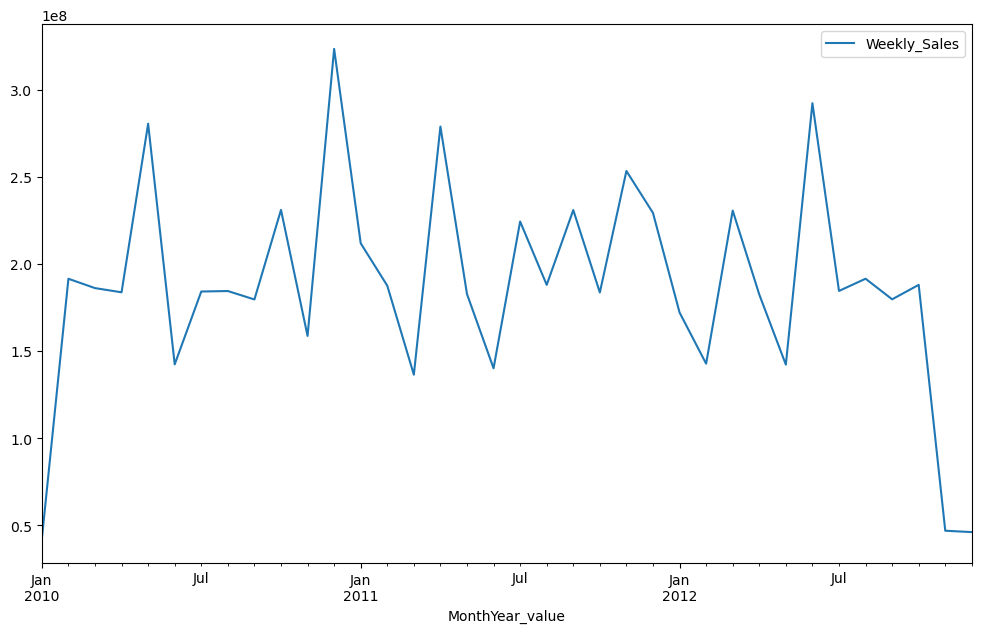

In [135]:
yearly_sales = data.groupby(['MonthYear_value']).sum()
yearly_sales[['Weekly_Sales']].plot(figsize=(12,7), subplots=True);

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 1120x560 with 0 Axes>

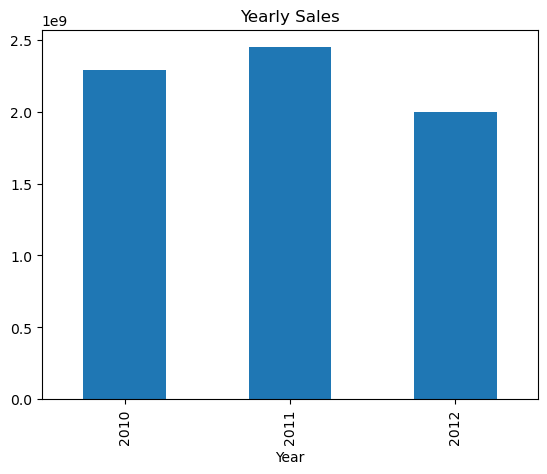

In [138]:
# Yearly Sales

plt.figure(figsize=(14,7), dpi=80)
data.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

Text(0.5, 1.0, 'Monthwise Sales')

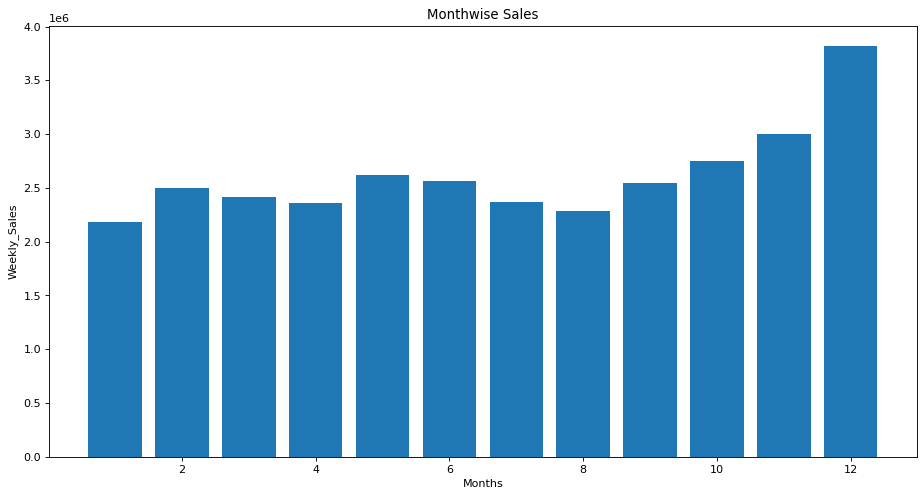

In [137]:
#Monthly Sales
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year

plt.figure(figsize=(14,7), dpi=80)
plt.bar(data['Month'],data['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise Sales')

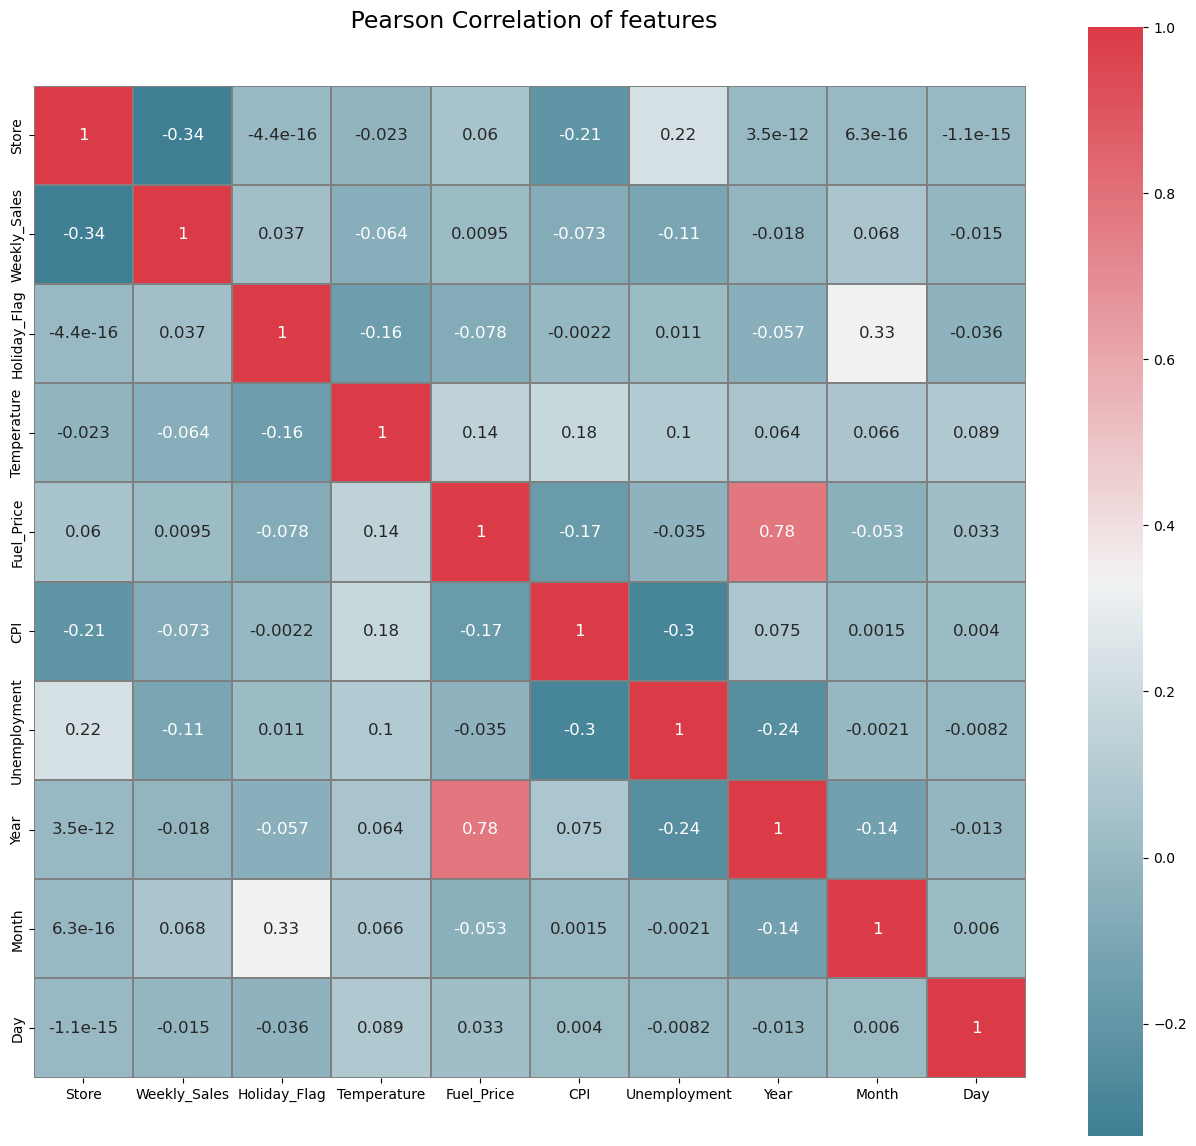

In [158]:
import seaborn as sns
# correlation heatmap of dataset
def correlation_heatmap(data):
    _ , ax = plt.subplots(figsize = (16,16))
    colormap = sns.diverging_palette(220 , 10 , as_cmap = True)
    
    _  = sns.heatmap(
        data.corr(),
        cmap = colormap,
        square = True,
        cbar_kws = {'shrink' : 0.9},
        ax = ax,
        annot = True, 
        linewidths = 0.1 , vmax = 1.0 , linecolor = 'grey',
        annot_kws = {'fontsize' : 12}
    )
    
    plt.title(' Pearson Correlation of features' , y = 1.05 , size = 17) 
    
correlation_heatmap(data)


In [160]:
import numpy as np

#unemployment increases sales decreases
print("The correlation coefficient  between Weekly_Sales and Holiday_Flag is :",
np.corrcoef(data['Weekly_Sales'],data['Unemployment'])[0,1])

The correlation coefficient  between Weekly_Sales and Holiday_Flag is : -0.10617608965795418


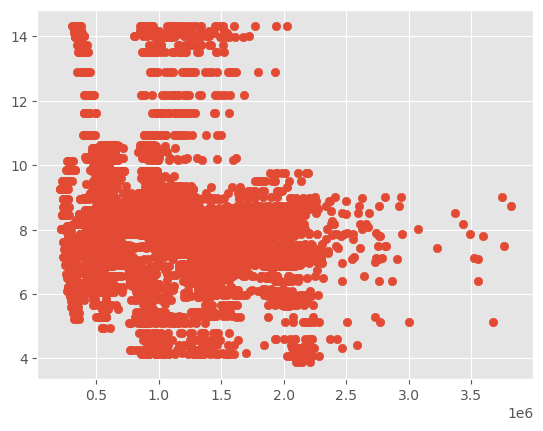

In [161]:
plt.style.use('ggplot')
plt.scatter(data['Weekly_Sales'],data['Unemployment'])
plt.show()

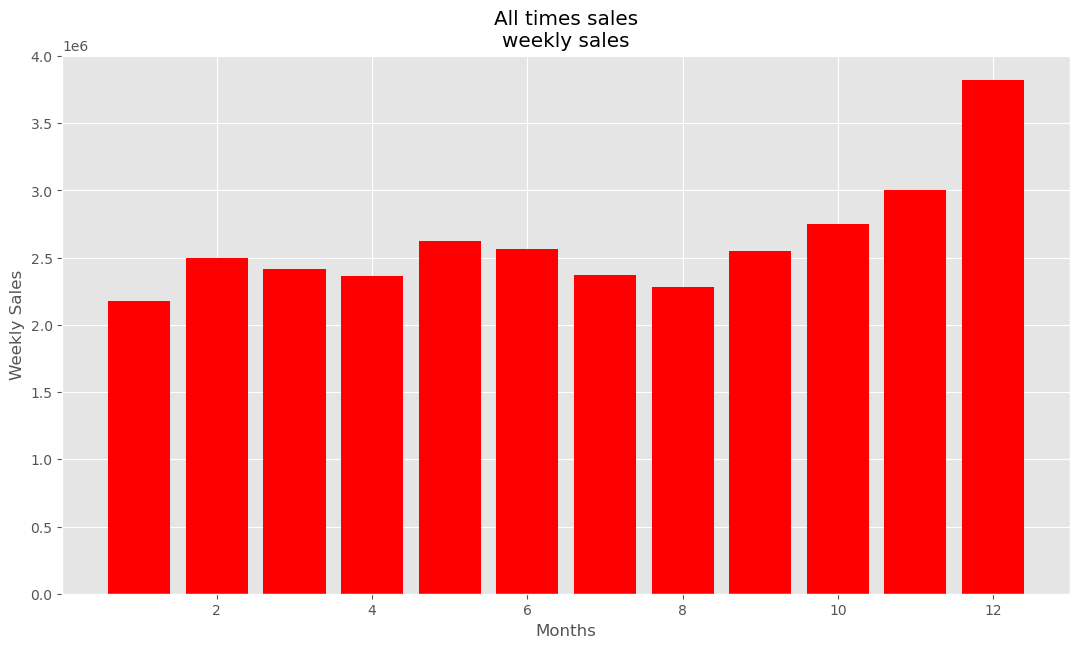

In [171]:
#The highest sales season is in December

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(13, 7))
# Add x-axis and y-axis
ax.bar(data['Month'],
        data['Weekly_Sales'],
        color=['red'])

ax.set(xlabel="Months",
       ylabel="Weekly Sales",
       title="All times sales\nweekly sales")

plt.show()

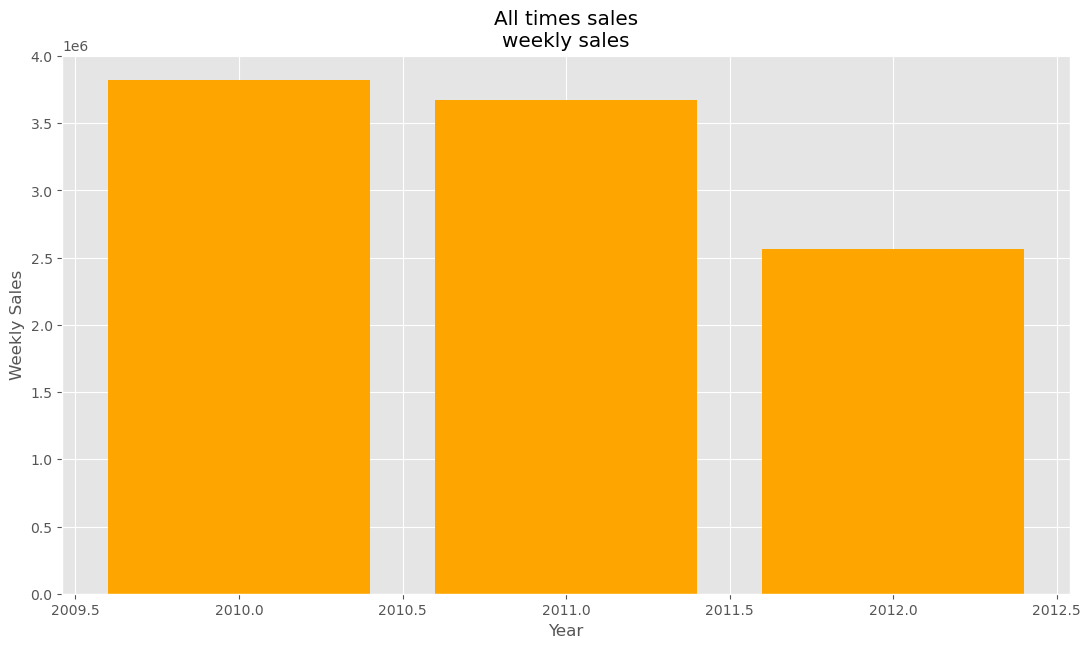

In [172]:
#Sales is deteriorating over time

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(13, 7))

ax.bar(data['Year'],
        data['Weekly_Sales'],
        color='orange')

ax.set(xlabel="Year",
       ylabel="Weekly Sales",
       title="All times sales\nweekly sales")

plt.show()

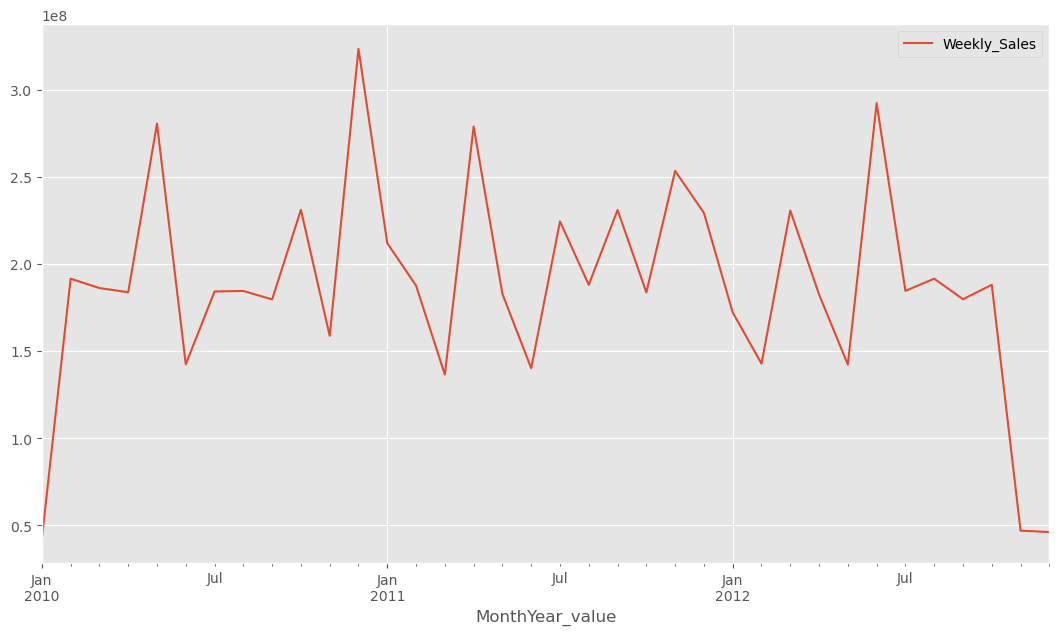

In [173]:
#Comparing Sales over years. Since oct 2012 real decline happend

sales_year = data.groupby(['MonthYear_value']).sum()
sales_year[['Weekly_Sales']].plot(
 figsize=(13, 7), subplots=True);

In [142]:
# Calculate summary statistics
summary_stats = data.describe()
summary_stats


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,15.650350
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,8.753908
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,8.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,16.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,23.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,31.000000


In [176]:
data['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [177]:
sales_2010=pd.DataFrame(data[data['Year']==2010])
sales_2011=pd.DataFrame(data[data['Year']==2011])
sales_2012=pd.DataFrame(data[data['Year']==2012])

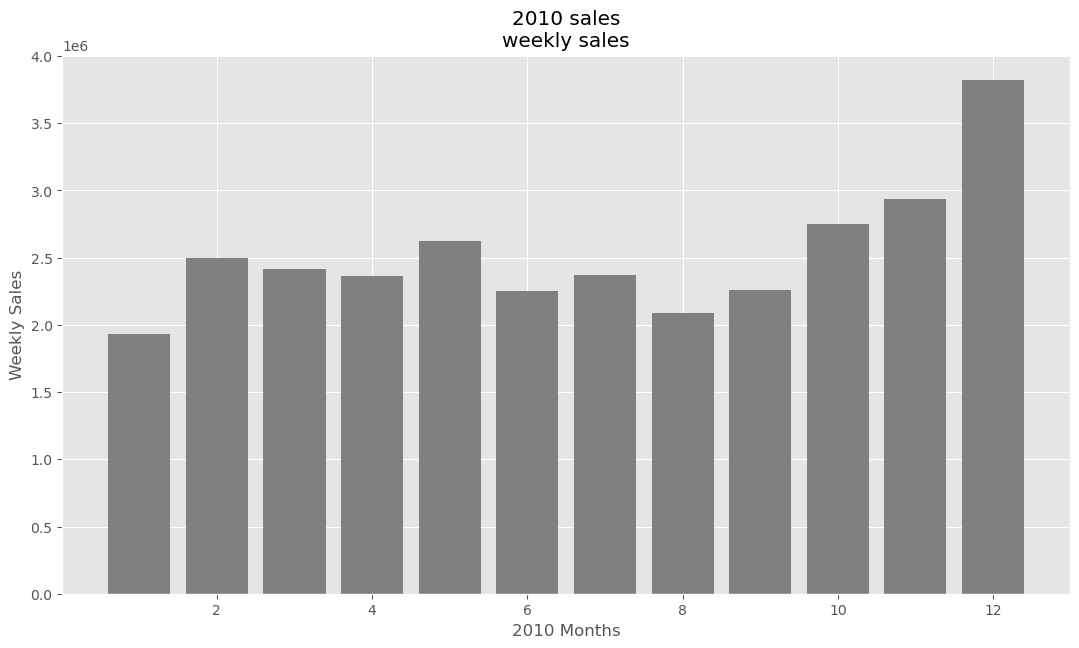

In [179]:
#Sales 2010

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(13, 7))

# Add x-axis and y-axis
ax.bar(sales_2010['Month'],
        sales_2010['Weekly_Sales'],
        color='grey')

# Set title and labels for axes
ax.set(xlabel="2010 Months",
       ylabel="Weekly Sales",
       title="2010 sales\nweekly sales")
plt.show()

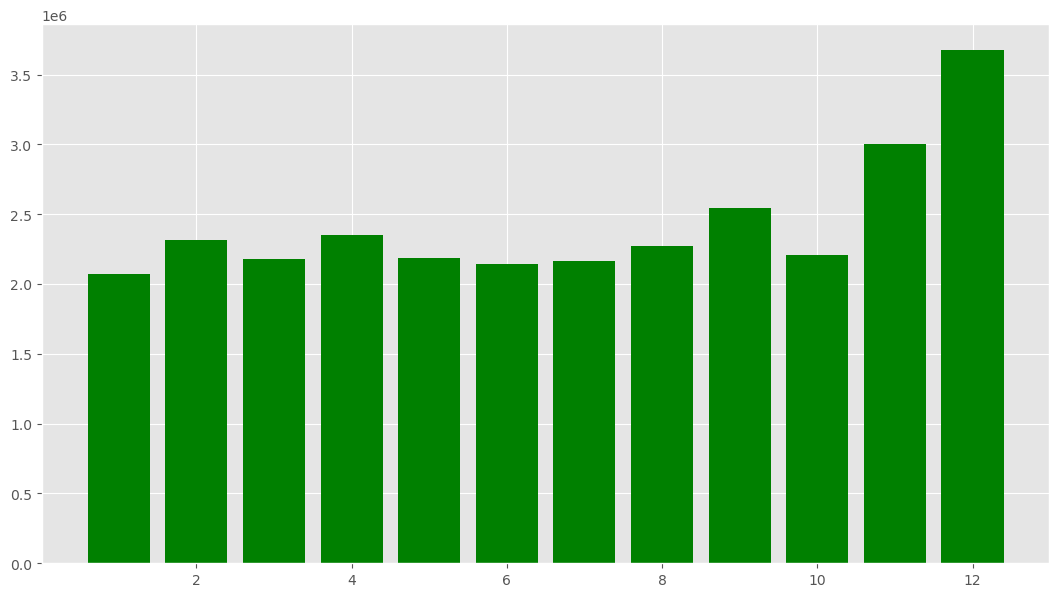

In [180]:
#Sales 2011

plt.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(13, 7))
# Add x-axis and y-axis
ax1.bar(sales_2011['Month'],
        sales_2011['Weekly_Sales'],
        color='green')
plt.show()

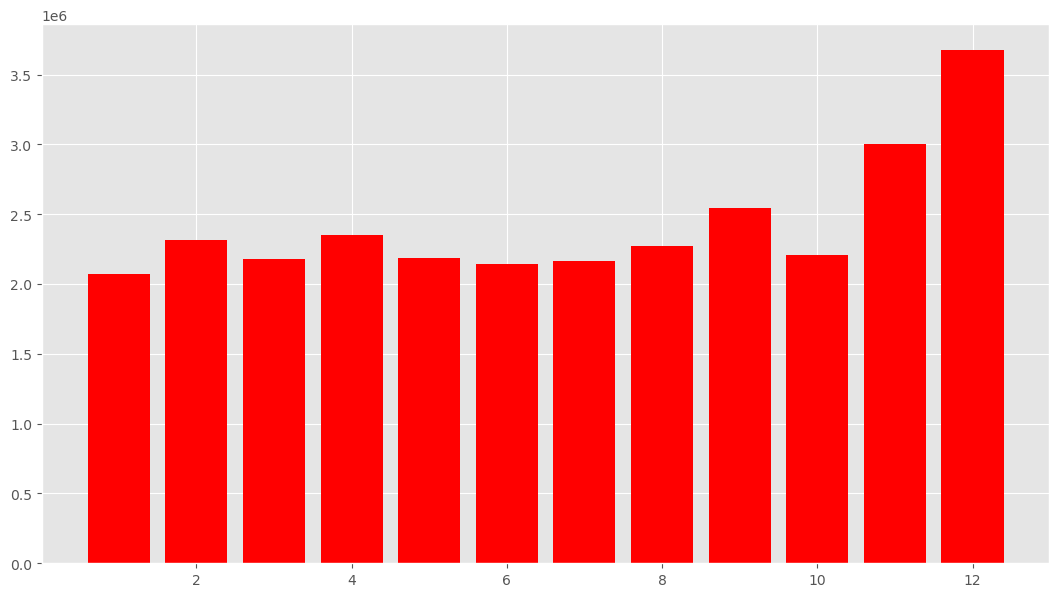

In [181]:
#Sales 2011

plt.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(13, 7))
# Add x-axis and y-axis
ax1.bar(sales_2011['Month'],
        sales_2011['Weekly_Sales'],
        color='red')
plt.show()

#  Conclusion: There are peaks in sales  in Q4 in 2010, 2011 and Feb, June  and Oct are peaks for 2012

In [197]:
#TOP 5 weekly sales stores

data=data.groupby(data['Store']).aggregate({'Weekly_Sales': 'std'}).sort_values(by = 'Weekly_Sales',ascending = False)
data.reset_index(drop=True)
print("\n TOP 3 stores for weekly sales \n")
data.head(3)


 TOP 3 stores for weekly sales 



,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742


In [210]:
data = pd.read_csv("Walmart.csv")
data['Store']

0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: int64

Basic Analysis Tasks

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

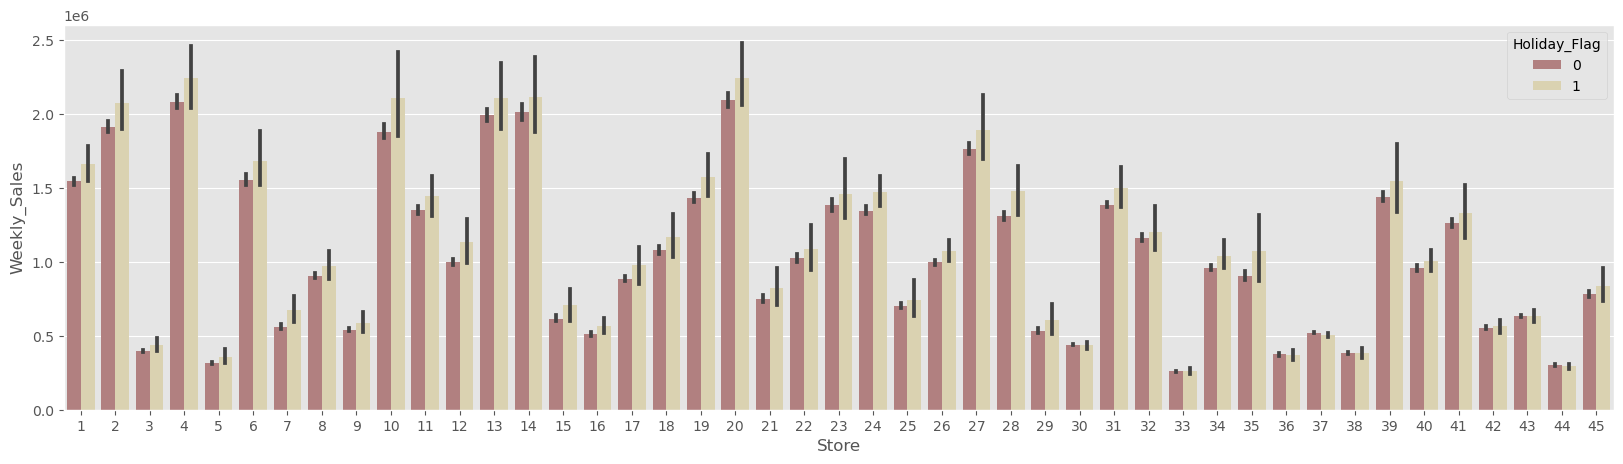

In [211]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=data, x="Store", y="Weekly_Sales", hue="Holiday_Flag", ax=ax, palette = "pink")

Store with Maximum Weekly Sales

In [216]:
data = data.groupby(['Store'], as_index=False).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum'))

In [217]:
data[(data['Sum_of_Weekly_Sales'] == max(data['Sum_of_Weekly_Sales']))]

,Store,Sum_of_Weekly_Sales
19,20,3.013978e+08


<AxesSubplot:xlabel='Store', ylabel='Sum_of_Weekly_Sales'>

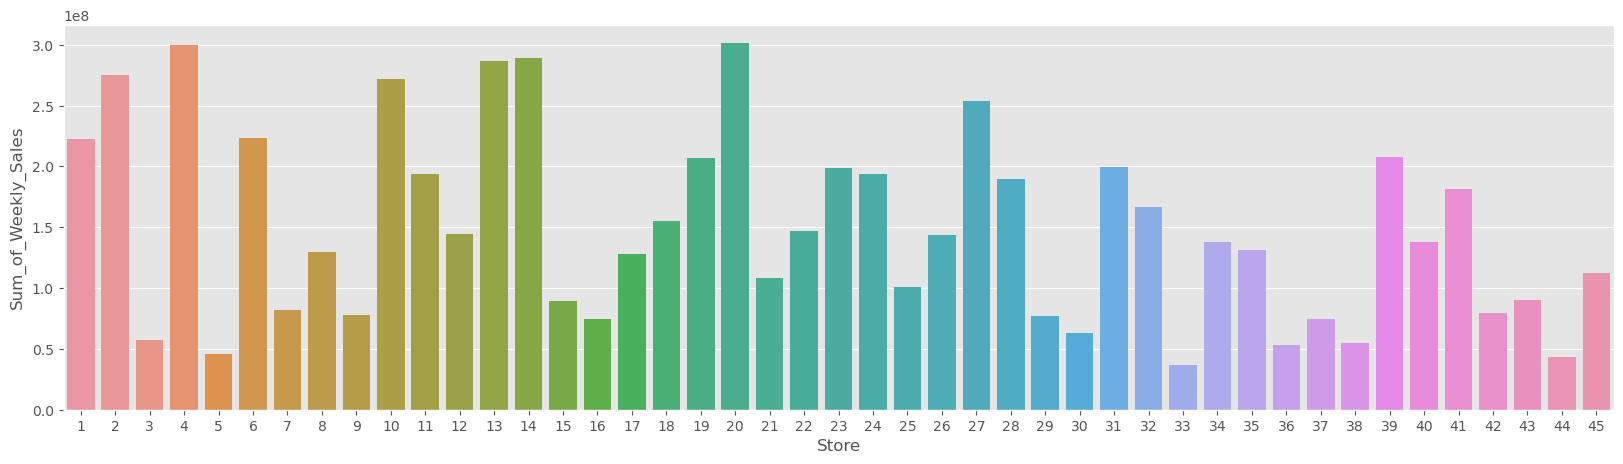

In [218]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=data, x="Store", y="Sum_of_Weekly_Sales", ax=ax)

Store 14 is with highest variation of Weekly Sales

In [224]:
data = pd.read_csv("Walmart.csv")
data['Weekly_Sales']

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [222]:
data = data.groupby('Store', as_index=False).agg(Sales_sum=('Weekly_Sales','sum'), 
                                        Mean_Sales=('Weekly_Sales','mean'), 
                                        Std_Sales=('Weekly_Sales', 'std'),
                                        Sales_Variance=('Weekly_Sales','var'))
data

,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance
0,1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10
1,2,2.753824e+08,1.925751e+06,237683.694682,5.649354e+10
2,3,5.758674e+07,4.027044e+05,46319.631557,2.145508e+09
3,4,2.995440e+08,2.094713e+06,266201.442297,7.086321e+10
4,5,4.547569e+07,3.180118e+05,37737.965745,1.424154e+09
5,6,2.237561e+08,1.564728e+06,212525.855862,4.516724e+10
6,7,8.159828e+07,5.706173e+05,112585.469220,1.267549e+10
7,8,1.299512e+08,9.087495e+05,106280.829881,1.129561e+10
8,9,7.778922e+07,5.439806e+05,69028.666585,4.764957e+09
9,10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10


In [227]:
data = pd.read_csv("Walmart.csv")

# Calculate sales statistics
data = data.groupby('Store', as_index=False).agg(
    Sales_sum=('Weekly_Sales', 'sum'),
    Mean_Sales=('Weekly_Sales', 'mean'),
    Std_Sales=('Weekly_Sales', 'std'),
    Sales_Variance=('Weekly_Sales', 'var')
)

# Calculate coefficient of variation
data['Coeff_of_Variation'] = (data['Std_Sales'] / data['Mean_Sales']) * 100

data

,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance,Coeff_of_Variation
0,1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10,10.029212
1,2,2.753824e+08,1.925751e+06,237683.694682,5.649354e+10,12.342388
2,3,5.758674e+07,4.027044e+05,46319.631557,2.145508e+09,11.502141
3,4,2.995440e+08,2.094713e+06,266201.442297,7.086321e+10,12.708254
4,5,4.547569e+07,3.180118e+05,37737.965745,1.424154e+09,11.866844
5,6,2.237561e+08,1.564728e+06,212525.855862,4.516724e+10,13.582286
6,7,8.159828e+07,5.706173e+05,112585.469220,1.267549e+10,19.730469
7,8,1.299512e+08,9.087495e+05,106280.829881,1.129561e+10,11.695283
8,9,7.778922e+07,5.439806e+05,69028.666585,4.764957e+09,12.689547
9,10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10,15.913349


Store with Growth Rate in Q3-2012

In [231]:
data['Year'] = pd.to_datetime(data['Date'], format="%d-%m-%Y").dt.year
data['Month'] = pd.to_datetime(data['Date'], format="%d-%m-%Y").dt.month

data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [232]:
def assign_quarter_category(month):
    if month <= 3:
        return 'Q1'
    elif month >= 4 and month <= 6:
        return 'Q2'
    elif month >=7 and month <= 9:
        return 'Q3'
    elif month >= 10 and month <= 12:
        return 'Q4'
    else:
        return np.nan

In [233]:
data['Quarter'] = data['Month'].apply(assign_quarter_category)
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Q1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Q1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Q3
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,Q4
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,Q4
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Q4


In [238]:
sales_2012 = data[(data['Year']) == 2012]
sales_2012.drop(['Month', 'Year'], axis='columns', inplace=True)
sales_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
100,1,06-01-2012,1550369.92,0,49.01,3.157,219.714258,7.348,Q1
101,1,13-01-2012,1459601.17,0,48.53,3.261,219.892526,7.348,Q1
102,1,20-01-2012,1394393.84,0,54.11,3.268,219.985689,7.348,Q1
103,1,27-01-2012,1319325.59,0,54.26,3.290,220.078852,7.348,Q1
104,1,03-02-2012,1636339.65,0,56.55,3.360,220.172015,7.348,Q1
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Q3
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Q4
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Q4
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Q4


In [239]:
sales_2012.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
count,1935.00000,1935,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935
unique,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,06-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,Q1
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,585
mean,23.00000,NaN,1.033660e+06,0.046512,63.362403,3.709776,175.498781,7.347964,NaN
std,12.99053,NaN,5.366535e+05,0.210645,16.944776,0.276605,40.681282,1.699465,NaN
min,1.00000,NaN,2.369205e+05,0.000000,7.460000,3.031000,130.157516,3.879000,NaN
25%,12.00000,NaN,5.585294e+05,0.000000,52.060000,3.545000,136.753000,6.228000,NaN
50%,23.00000,NaN,9.604761e+05,0.000000,65.540000,3.717000,190.461896,7.147000,NaN
75%,34.00000,NaN,1.426383e+06,0.000000,76.575000,3.891000,220.488647,8.253000,NaN


In [237]:
quater_sales = data_2012.groupby(["Store", "Quarter"]).agg(Quarterwise_Sales=('Weekly_Sales', 'sum'))
quater_sales

Quarterwise_Sales
Store Quarter                   
1     Q1             20723762.83
      Q2             20978760.12
      Q3             20253947.78
      Q4              6245587.29
2     Q1             24528220.70
...                          ...
44    Q4              1360020.41
45    Q1              9805267.57
      Q2             10390767.83
      Q3              9581268.38
      Q4              2946326.39

[180 rows x 1 columns]

<AxesSubplot:xlabel='Store,Quarter'>

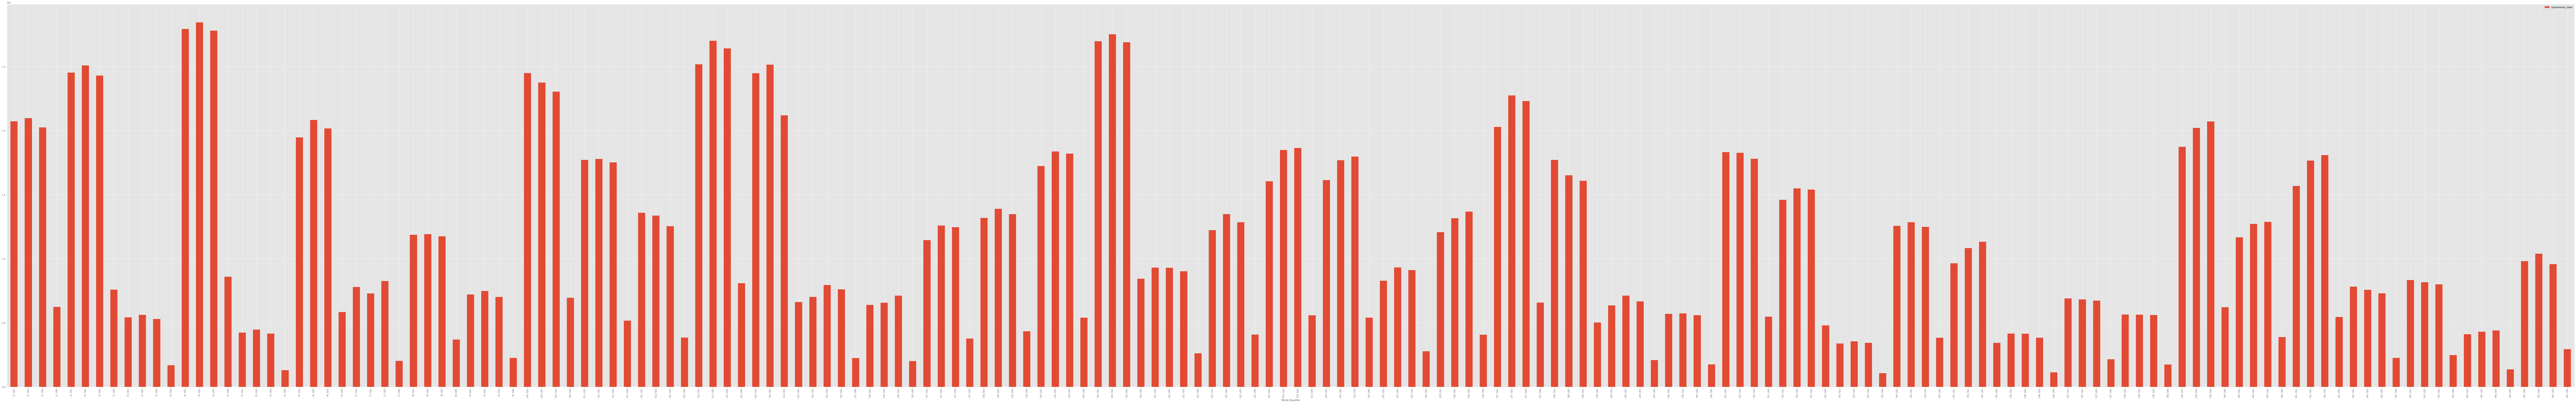

In [240]:
quater_sales.plot(kind = 'bar', grid=True, figsize=(200, 30))

In [241]:
quarterly_percentage = quater_sales.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
quarterly_percentage

Quarterwise_Sales
Store Quarter                   
1     Q1               30.385832
      Q2               30.759717
      Q3               29.696975
      Q4                9.157476
2     Q1               30.097197
...                          ...
44    Q4                9.586132
45    Q1               29.963875
      Q2               31.753103
      Q3               29.279357
      Q4                9.003666

[180 rows x 1 columns]

In [242]:
quarterly_percentage.reset_index(inplace=True)
Q3 = quarterly_percentage[(quarterly_percentage['Quarter']) == 'Q3']
Q3

,Store,Quarter,Quarterwise_Sales
2,1,Q3,29.696975
6,2,Q3,29.821276
10,3,Q3,29.393455
14,4,Q3,29.962742
18,5,Q3,29.386961
22,6,Q3,30.411367
26,7,Q3,32.572264
30,8,Q3,29.945906
34,9,Q3,29.290652
38,10,Q3,29.448634


In [243]:
Q3[(Q3['Quarterwise_Sales'] == max(Q3['Quarterwise_Sales']))]

,Store,Quarter,Quarterwise_Sales
26,7,Q3,32.572264


<AxesSubplot:xlabel='Store', ylabel='Quarterwise_Sales'>

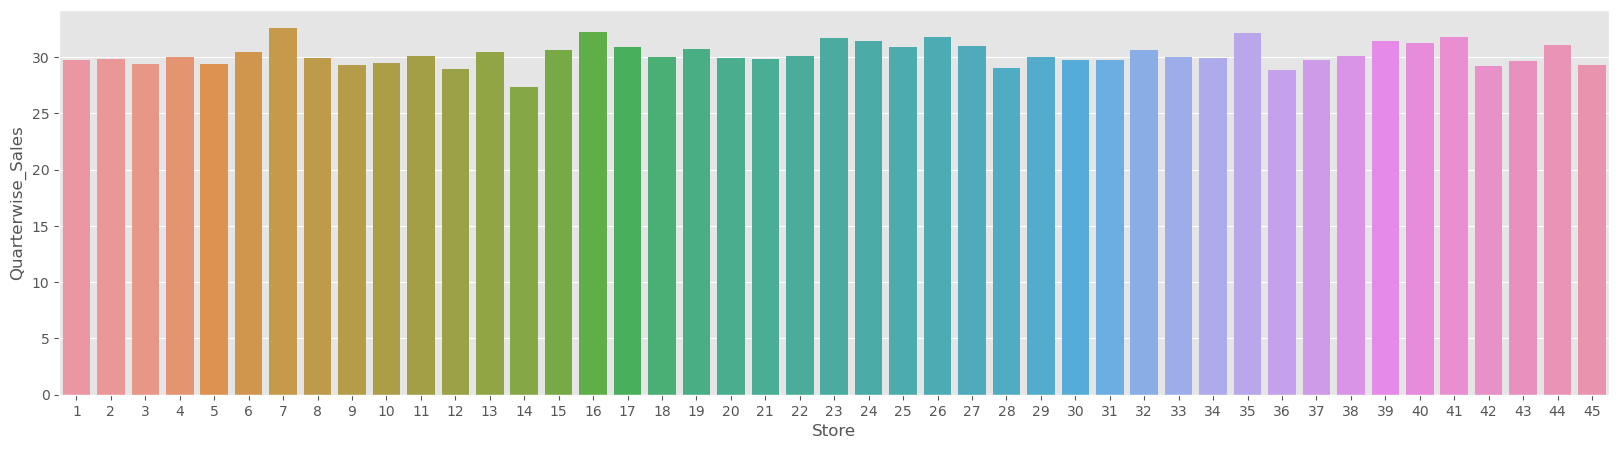

In [247]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=Q3, x="Store", y="Quarterwise_Sales", ax=ax)

Quarterly Growth Rate in Store 7 in Q3' 2012 is 35.57

Defining the stores with higher holiday sales than mean sales in non - holiday season

In [248]:
def assign_holiday(date):
    if date in ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']:
        return 'Super Bowl'
    elif date in ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']:
        return 'Labour Day'
    elif date in ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']:
        return 'Thanksgiving'
    elif date in ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']:
        return 'Christmas'
    else:
        return 'Non-Holiday' 

In [250]:
data_holiday_analysis = data.drop(['Store', 'Year', 'Month'], axis='columns')
data_holiday_analysis['Holiday'] = data_holiday_analysis['Date'].apply(assign_holiday)
data_holiday_analysis

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Q1,Non-Holiday
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Q1,Super Bowl
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Q1,Non-Holiday
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Q1,Non-Holiday
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Q1,Non-Holiday
...,...,...,...,...,...,...,...,...,...
6430,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Q3,Non-Holiday
6431,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Q4,Non-Holiday
6432,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Q4,Non-Holiday
6433,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Q4,Non-Holiday


In [251]:
data_mean = data_holiday_analysis.groupby('Holiday').agg(Mean_Weekly_Sales=('Weekly_Sales','mean'))
data_mean

,Mean_Weekly_Sales
Holiday,
Christmas,9.608331e+05
Labour Day,1.042427e+06
Non-Holiday,1.041256e+06
Super Bowl,1.079128e+06
Thanksgiving,1.471273e+06


<AxesSubplot:xlabel='Holiday'>

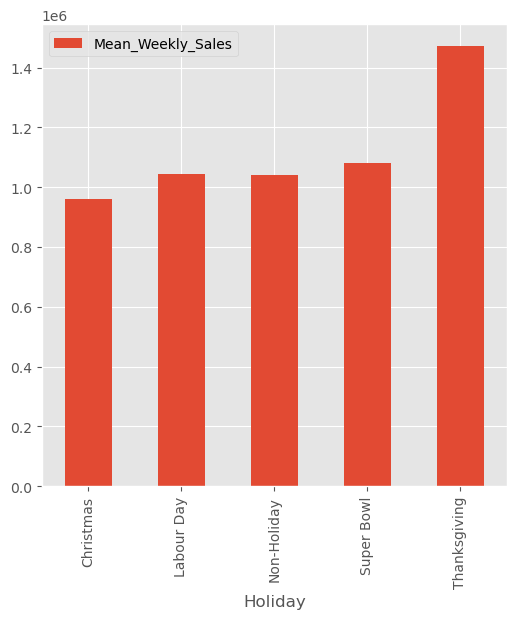

In [252]:
data_mean.plot(kind='bar', y='Mean_Weekly_Sales', figsize=(6,6))

In [253]:
data_mean.sort_values(by='Mean_Weekly_Sales')

,Mean_Weekly_Sales
Holiday,
Christmas,9.608331e+05
Non-Holiday,1.041256e+06
Labour Day,1.042427e+06
Super Bowl,1.079128e+06
Thanksgiving,1.471273e+06


There is not much diffrence in sales for holidays like Labour Day, Super Bowl, Thanksgiving  and non-holiday days. However Chrismas has a good increase in sales

In [254]:
data_holiday_analysis

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Q1,Non-Holiday
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Q1,Super Bowl
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Q1,Non-Holiday
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Q1,Non-Holiday
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Q1,Non-Holiday
...,...,...,...,...,...,...,...,...,...
6430,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Q3,Non-Holiday
6431,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Q4,Non-Holiday
6432,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Q4,Non-Holiday
6433,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Q4,Non-Holiday


<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Quarter'>

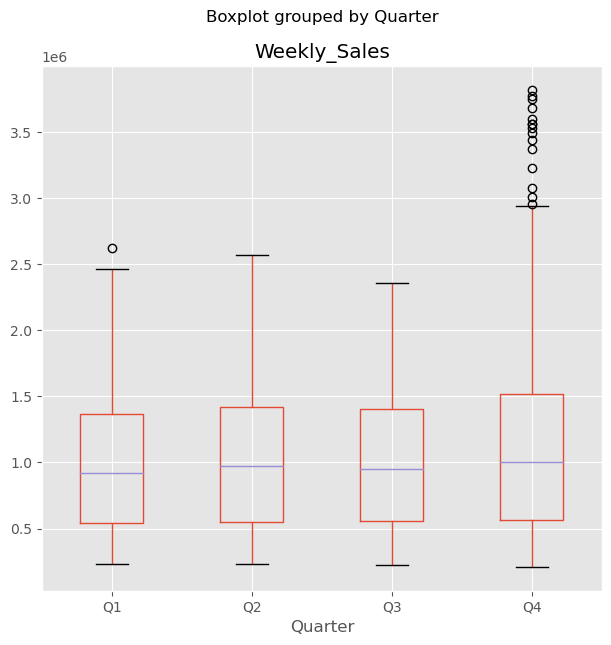

In [255]:
data_holiday_analysis.boxplot(by='Quarter', column=['Weekly_Sales'], figsize=(7,7))

In [256]:
data_holiday_analysis.groupby('Quarter').agg({'Weekly_Sales':'std'})

,Weekly_Sales
Quarter,
Q1,531586.678340
Q2,543203.300352
Q3,528621.228868
Q4,654298.120425


In [257]:
pd.pivot_table(data_holiday_analysis, index=["Quarter",'Holiday'], aggfunc={'Weekly_Sales':np.mean})

Weekly_Sales
Quarter Holiday                   
Q1      Non-Holiday   9.988370e+05
        Super Bowl    1.079128e+06
Q2      Non-Holiday   1.040806e+06
Q3      Labour Day    1.042427e+06
        Non-Holiday   1.021697e+06
Q4      Christmas     9.608331e+05
        Non-Holiday   1.115843e+06
        Thanksgiving  1.471273e+06

In [258]:
pd.pivot_table(data_holiday_analysis, index=["Holiday_Flag"], aggfunc={'Weekly_Sales':'sum', 'CPI':np.mean})

,CPI,Weekly_Sales
Holiday_Flag,,
0,171.601725,6.231919e+09
1,171.268092,5.052996e+08


Quarter with Low/High Unemployment Rate

In [259]:
quater_Unemployment = data.groupby('Quarter', as_index=False).agg(Mean_Unemployment_Rate=('Unemployment','mean'))
quater_Unemployment

,Quarter,Mean_Unemployment_Rate
0,Q1,8.062340
1,Q2,8.022459
2,Q3,7.925542
3,Q4,7.997541


<AxesSubplot:xlabel='Quarter', ylabel='Mean_Unemployment_Rate'>

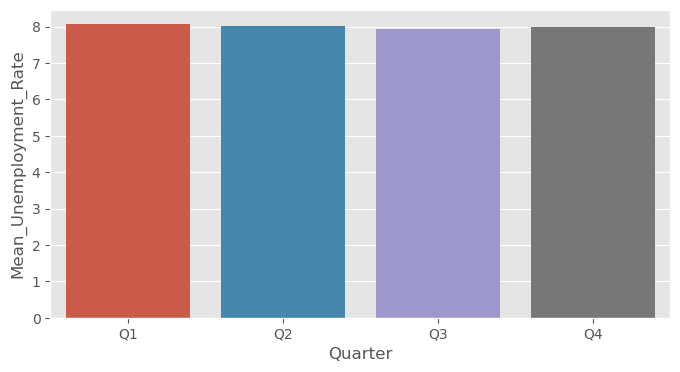

In [265]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=quater_Unemployment, x="Quarter", y="Mean_Unemployment_Rate", ax=ax)

In conclusion we have to say that there is not much diffrence between the lowest  unemployments rate between Q1 and Q2 (Q1-8.062340, Q2-8.022459)However Q2 has a lowest Unemployment rate. 
Again there is not much diffrence between Q3 and Q4 (Q3-7.925542, Q4-7.997541), but Q4 has highest Unemployment rate

# Walmart Sales Prediction

Train and test the model 

In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("Walmart.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [308]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['MonthYear_value'] = data['Date'].dt.to_period('M')


In [309]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2010-05


In [312]:
x = data[['Store', 'Fuel_Price', 'CPI', 'Unemployment','Day', 'Month', 'Year']]
y = data['Weekly_Sales']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [313]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

We will use 3 different algorithms to  better understand which model to use to predict the weekly sales.

In [314]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [315]:
# 1.Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

In [316]:
print('Train Accuracy Score:', lr.score(x_train, y_train).round(2)*100, '%')
print('Test Accuracy Score:', r2_score(y_test, lr_y_pred).round(2)*100, '%')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred).round(2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred).round(2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)).round(2))

Train Accuracy Score: 14.000000000000002 %
Test Accuracy Score: 16.0 %
Mean Absolute Error: 430047.93
Mean Squared Error: 269339485434.19
Root Mean Squared Error: 518979.27


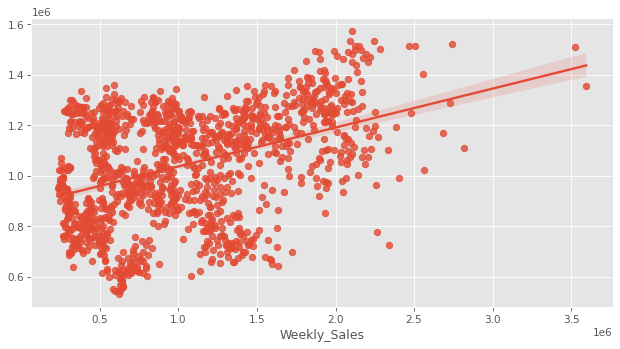

In [318]:
plt.figure(figsize=(10, 5), dpi=75)
sns.regplot(x=y_test, y=lr_y_pred)

plt.show()

In [319]:
# Cross Validation of Linear Regression

lr_scores = cross_val_score(lr, x_train,y_train, cv=10, scoring='r2')
print(lr_scores)
print("Mean Score:", lr_scores.mean()*100,'%')

[0.1265928  0.09597783 0.16264186 0.08793394 0.20315869 0.18451666
 0.14074742 0.16855324 0.08803297 0.10166651]
Mean Score: 13.598219106401006 %


In [320]:
# 2.Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

rfr_y_pred = rfr.predict(x_test)

R2_rfr = r2_score(y_test, rfr_y_pred)
mae = metrics.mean_absolute_error(y_test, rfr_y_pred)
mse = metrics.mean_squared_error(y_test, rfr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred))

print('* Random Forest Regressor *\n')

print('Accuracy                 =', R2_rfr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

* Random Forest Regressor *

Accuracy                 = 91.12700000000001 %
Mean Absolute Error      = 96564.60146
Mean Squared Error       = 28529722996.06177
Root Mean Squared Error  = 168907.43914


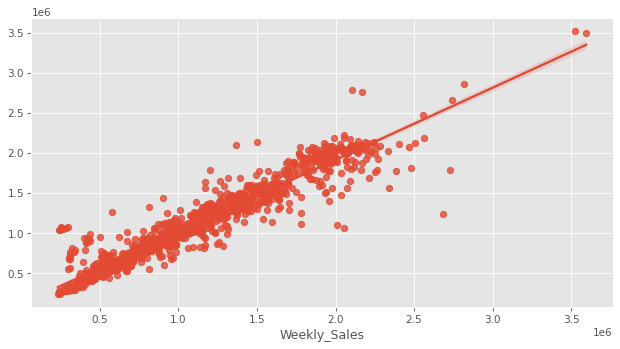

In [326]:
plt.figure(figsize=(10, 5), dpi=75)
sns.regplot(x=y_test, y=rfr_y_pred)

plt.show()

In [322]:
# Cross Validation of Random Forest Regression

rfr_scores = cross_val_score(rfr, x_train,y_train, cv=10, scoring='r2')
print(rfr_scores)
print("Mean Score:", rfr_scores.mean()*100,'%')

[0.96535024 0.95212585 0.9485399  0.94809762 0.96236214 0.95518999
 0.94778751 0.94851939 0.96242777 0.96145038]
Mean Score: 95.51850805773402 %


In [323]:
# 3.Decission Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

dtr_y_pred = dtr.predict(x_test)

R2_dtr = r2_score(y_test,dtr_y_pred)
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

print('* Decision Tree Regressor *\n')

print('Accuracy                 =', R2_dtr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

* Decision Tree Regressor *

Accuracy                 = 85.776 %
Mean Absolute Error      = 115803.22463
Mean Squared Error       = 45734355872.10397
Root Mean Squared Error  = 213855.92316


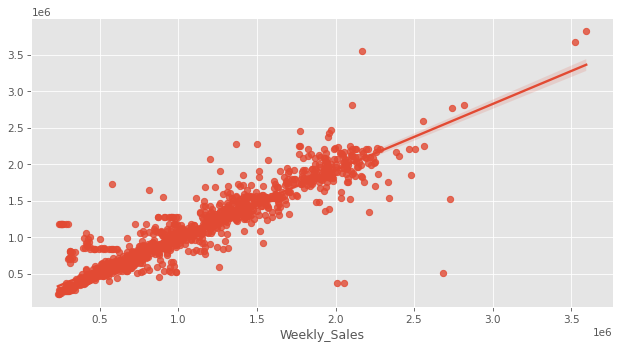

In [325]:
plt.figure(figsize=(10, 5), dpi=75)
sns.regplot(x=y_test, y=dtr_y_pred)

plt.show()

In [327]:
# Cross Validation of Decision Tree

dtr_scores = cross_val_score(dtr, x_train,y_train, cv=10, scoring='r2')
print(dtr_scores)
print("Mean Score:", dtr_scores.mean()*100,'%')

[0.92520428 0.93789458 0.94712012 0.92328076 0.9315235  0.93287667
 0.93073689 0.95090071 0.94586616 0.94603236]
Mean Score: 93.71436020881401 %


In [436]:
# Model  SARIMAX Fitting

In [437]:
# Convert train_data to numeric data type
import numpy as np

# Convert train_data to numeric data type
x_train = np.array(x_train).astype(float)


In [438]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

endog = x_train

model = SARIMAX(endog, order=(8, 0, 8), seasonal_order=(8, 1, 8, 12))
results = model.fit()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           33     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   33      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [439]:
# Convert data to numeric data type
columns_to_convert = ['Date', 'Year', 'Month', 'Day', 'MonthYear_value']

# Convert datetime values to numeric representation
for column in columns_to_convert:
    if data[column].dtype == 'datetime64[ns]':
        data[column] = data[column].astype(float)
    elif data[column].dtype == 'period[Q-DEC]':
        # Handle columns with PeriodArray
        data[column] = data[column].dt.to_timestamp().astype(float)




In [440]:
# Get the residuals from the model
residuals = results.resid

In [441]:
# Import the necessary libraries
# import numpy as np
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt

# # Convert data to numeric data type
# columns_to_convert = ['Date', 'Year', 'Month', 'Day', 'MonthYear_value']

# # Convert datetime values to numeric representation
# for column in columns_to_convert:
#     if data[column].dtype == 'datetime64[ns]':
#         data[column] = data[column].astype(float)
#     elif data[column].dtype == 'period[Q-DEC]':
#         # Handle columns with PeriodArray
#         data[column] = data[column].dt.to_timestamp().astype(float)

# # Create the SARIMAX model
# model = SARIMAX(data, order=(8, 0, 8), seasonal_order=(8, 1, 8, 12))
# results = model.fit()

# # Get the residuals from the model
# residuals = results.resid

# # Create the ACF and PACF plots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
# plot_acf(residuals, ax=ax1, lags=20)
# ax1.set_xlabel('Lag')
# ax1.set_ylabel('Autocorrelation')
# ax1.set_title('Autocorrelation Function (ACF) of Residuals')

# plot_pacf(residuals, ax=ax2, lags=20)
# ax2.set_xlabel('Lag')
# ax2.set_ylabel('Partial Autocorrelation')
# ax2.set_title('Partial Autocorrelation Function (PACF) of Residuals')

# plt.tight_layout()
# plt.show()



In [442]:
#Part II: Draw ACF and PACF Plot Charts to identify the SARIMA Model


<Figure size 1000x600 with 0 Axes>

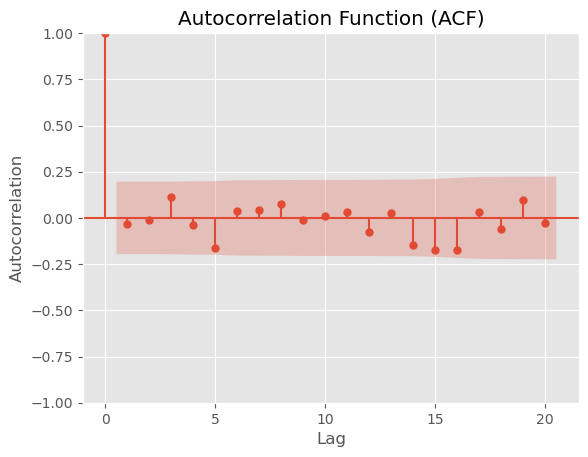

In [443]:
# Draw ACF Plot Charts to identify the SARIMA Model

# Import the required libraries
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# Generate random time series data
ts = np.random.randn(100)  # Replace this line with your actual time series data

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(ts, lags=20) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

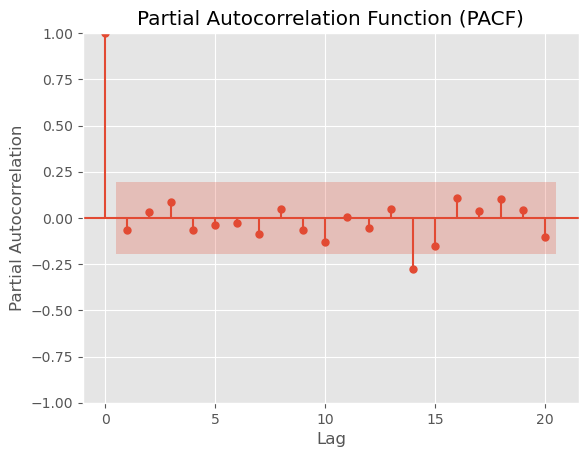

In [444]:
# Draw PACF Plot Charts to identify the SARIMA Model
# Import the required libraries
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import numpy as np

# Generate random time series data
ts = np.random.randn(100)  # Replace this line with your actual time series data

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(ts, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()



Inferences from Walmart Project

Linear Regresssion is giving us Train Accuracy Score: 14.00%,Test Accuracy Score: 16.0 % and CV-13.59&, Random Forest Regressor:Accuracy- 91.12 % and CV- 95,51%, Decision Tree Regressor:
Accuracy - 85.77 % and CV-93.71%. The best algorithm for prediction is Random Forest Regresssor.

Future Possibilities of the Project

When discussing future possibilities for a project like the Walmart project, you can consider various aspects and potential areas of improvement. Here are some ideas:

1. Advanced forecasting models: Explore the use of more advanced forecasting models, such as machine learning algorithms or deep learning models, to improve the accuracy of sales and demand predictions. This can involve incorporating additional data sources, such as weather data or economic indicators, to capture more complex patterns and trends.

2. Enhanced inventory management: Implement more sophisticated inventory management techniques, such as just-in-time inventory or dynamic pricing strategies, to optimize stock levels and improve profitability. This could involve integrating real-time sales data, demand forecasts, and supply chain information to make data-driven decisions.

3. Personalized customer experience: Leverage customer data and analytics to provide personalized recommendations and offers to customers. Develop a customer segmentation strategy based on purchasing behavior, demographics, and preferences to tailor marketing campaigns and promotions.

4. Supply chain optimization: Apply data analytics and optimization techniques to streamline the supply chain operations. This includes optimizing transportation routes, minimizing out-of-stock situations, improving warehouse efficiency, and reducing overall operational costs.

5. Online and mobile presence: Strengthen the online and mobile presence of Walmart by enhancing the e-commerce platform, improving user experience, and leveraging data analytics to personalize online shopping experiences. Consider exploring technologies like mobile apps, virtual assistants, or augmented reality to enhance the digital shopping experience.

6. Sustainability initiatives: Incorporate sustainability initiatives into Walmart's operations by focusing on energy efficiency, waste reduction, and environmentally friendly practices. Explore opportunities to leverage data and technology to track and optimize resource usage, reduce carbon footprint, and promote sustainable product offerings.

7. Customer feedback and sentiment analysis: Implement tools and techniques to gather customer feedback and perform sentiment analysis. Utilize natural language processing and machine learning algorithms to extract insights from customer reviews, social media interactions, and surveys, enabling Walmart to understand customer sentiment and make data-driven decisions to enhance customer satisfaction.

8. Partnerships and collaborations: Explore partnerships with technology providers, startups, or other organizations to leverage emerging technologies and innovative solutions that can benefit Walmart's operations. Collaborate with universities or research institutions to drive innovation in retail and explore new technologies like blockchain, Internet of Things (IoT), or artificial intelligence (AI).

Remember, these are just a few suggestions, and the specific future possibilities for the Walmart project will depend on the project goals, budget, resources, and market dynamics. It's important to align the future possibilities with the overall strategic objectives of Walmart and continuously adapt to changing customer needs and industry trends.